In [1]:
import pandas as pd
import scanpy as sc

import anndata as ad
from sklearn.preprocessing import StandardScaler

import utils as ut

INPUT_DIR = "./data/raw/mrd"
OUTPUT_DIR = "./data/output/"

# Step 1: Load the CSV file
# df = pd.read_csv("8_SN141_slides2_ROI-03.csv")

import os

feature_files = []
region_list = []
for path, subdirs, files in os.walk(INPUT_DIR):
    for name in files:
        fname, ext = os.path.splitext(name)
        if ext == ".csv":
            rel_path = os.path.relpath(path, INPUT_DIR)
            feature_files.append(os.path.join(rel_path, name))
            region_list.append(os.path.join(rel_path, fname))
print(feature_files)
print(region_list)

df = ut.combine_feature_files(
    INPUT_DIR,
    feature_files,
    region_list
    )


['./7_SN141_slides1_ROI-07.csv', './3_SN177_ROI-09.csv', './10_SN141_slides2_ROI-16.csv', './6_SN177_ROI-16.csv', './1_SN177_ROI-06.csv', './8_SN141_slides2_ROI-03.csv', './2_SN177_ROI-07.csv', './5_SN177_ROI-14.csv', './9_SN141_slides2_ROI-06.csv', './4_SN177_ROI-13.csv']
['./7_SN141_slides1_ROI-07', './3_SN177_ROI-09', './10_SN141_slides2_ROI-16', './6_SN177_ROI-16', './1_SN177_ROI-06', './8_SN141_slides2_ROI-03', './2_SN177_ROI-07', './5_SN177_ROI-14', './9_SN141_slides2_ROI-06', './4_SN177_ROI-13']
0
1
2
3
4
5
6
7
8
9
Invalid columns: ['DAPI C0 Biomarker Exp', 'DAPI C1 Biomarker Exp', 'DAPI C2 Biomarker Exp', 'DAPI C3 Biomarker Exp', 'DAPI C4 Biomarker Exp', 'DAPI C5 Biomarker Exp', 'DAPI C6 Biomarker Exp', 'DAPI C7 Biomarker Exp', 'DAPI C8 Biomarker Exp', 'DAPI C9 Biomarker Exp', 'DAPI C10 Biomarker Exp', 'DAPI C11 Biomarker Exp', 'DAPI C12 Biomarker Exp', 'DAPI C13 Biomarker Exp', 'DAPI C14 Biomarker Exp', 'DAPI C15 Biomarker Exp', 'DAPI C16 Biomarker Exp', 'DAPI C17 Biomarker Ex

In [2]:
# 1.b clean column names
import re
df.columns = df.columns.str.replace('Biomarker Exp', '', regex=False).str.strip()

In [3]:
# Step 2: Separate features and metadata
meta_column_names = ["Cell Id","Nuc X","Nuc Y Inv", "region_num", "unique_region"]
# meta_column_names = ["Cell Id","Nuc X","Nuc Y Inv"]
feature_cols = df.columns.difference(meta_column_names)
selected_features = [
"Arginase 1 REAL1137",
"CD11b REA1321",
"CD11c REA1310",
"CD14 REA1314",
"CD15 VIMC6",
"CD16 REA1324",
"CD163 REA1309",
"CD20 REAL1069",
"CD235a REA175",
"CD3 REAL1097",
"CD31 REA1312",
"CD34 REAL1217",
"CD38 REAL719",
"CD4 REA1307",
"CD45 5B1",
"CD68 REAL1346",
"CD73 REAL1172",
"CD79a REA1168",
"CD8a REA1024",
"FoxP3 REA1253",
"HLA DR REAL550",
"Ki 67 REAL1047",
"Mast Cell Tryptase REAL798",
"PAX 5 REA140",
"Podoplanin REA446",
]
unselected_features = feature_cols.difference(selected_features)
unselected_feat_exp = df[unselected_features].copy()
selected_feat_exp = df[selected_features].copy()
metadata = df[df.columns.difference(selected_features)].copy()

In [4]:
selected_feat_exp

,Arginase 1 REAL1137,CD11b REA1321,CD11c REA1310,CD14 REA1314,CD15 VIMC6,CD16 REA1324,CD163 REA1309,CD20 REAL1069,CD235a REA175,CD3 REAL1097,...,CD68 REAL1346,CD73 REAL1172,CD79a REA1168,CD8a REA1024,FoxP3 REA1253,HLA DR REAL550,Ki 67 REAL1047,Mast Cell Tryptase REAL798,PAX 5 REA140,Podoplanin REA446
0,92.446075,142.259811,263.029419,260.794128,473.009796,82.500000,129.750000,32.166668,33.583332,199.784317,...,101.857841,232.024506,50.289215,50.299019,28.663794,606.529419,2906.741455,915.549744,30.655172,18.553921
1,63.928825,81.206406,150.805450,102.587189,215.425858,116.973900,128.488724,21.953737,291.067627,21.415184,...,53.959667,192.825623,22.043890,41.408066,27.837742,101.887306,11579.800781,395.544678,15.996472,13.302491
2,58.732277,100.416931,155.667725,154.360840,240.758728,184.276184,247.616928,20.578836,34.892063,27.311111,...,51.900528,353.150269,22.980953,43.705822,23.393898,358.539673,494.533966,334.992188,20.898752,16.136507
3,100.900002,565.174622,352.888885,518.606323,901.536499,260.147614,384.165070,52.080952,35.563492,98.179367,...,75.065079,315.469849,46.155556,86.341270,25.766270,789.976196,3433.557373,625.216736,24.136572,44.326984
4,152.121292,192.881485,293.547211,368.655548,471.563904,323.624084,1158.716675,35.507408,38.294445,92.830559,...,98.732407,464.384247,70.951851,75.044441,29.427341,264.619446,9817.036133,710.422852,19.053537,27.427778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59097,376.449432,394.325836,134.213486,160.157303,10879.831055,64.168541,140.606735,39.853931,64.303368,30.943821,...,51.325844,1152.561768,10.359550,902.191040,38.985176,2506.078613,8195.530273,2444.791748,18.120296,31.033709
59098,52.661228,45.853199,109.343788,117.120453,486.233368,60.086575,498.111664,33.441658,333.089081,45.767879,...,266.397736,2092.158203,12.819323,2602.563477,38.961128,5011.687500,2323.346924,2841.781494,19.980564,84.668755
59099,25.795990,25.566628,57.830780,44.235260,179.464630,25.951651,133.029480,16.670401,43.293041,16.359079,...,84.324295,450.665680,10.929245,148.401535,34.485733,122.227005,690.050171,862.170654,10.052939,16.146816
59100,66.221237,206.017700,77.504425,230.247787,1534.725708,69.088493,203.123901,22.212389,43.769913,17.743362,...,47.053097,399.743378,9.752213,75.176994,39.306450,4681.858398,1326.938477,1031.706787,19.085686,22.982302


In [5]:
metadata

,AKT Pan REA676,Actin REAL650,Alexa647 anti rabbit1,BATF REA486,Bcl 2 REA872,CD104 REA236,CD117 REA787,CD123 REA918,CD134 ACT35,CD147 REA282,...,RRM2 REAL1010,Synaptophysin REA1121,TIM 3 REAL818,WT1 REA925,ZAP70 REA814,beta Catenin REA480,c myc REAL810,p53 REA1132,region_num,unique_region
0,30.198277,411.076538,298.543365,24.584482,581.000000,23.480392,20.686274,15.156863,25.730392,1141.382324,...,9.328431,61.014706,22.897058,24.214285,40.127453,53.101723,827.463013,39.113792,0,./7_SN141_slides1_ROI-07
1,36.241623,383.353912,236.329071,22.696650,875.947083,22.534994,25.661922,20.035587,23.281139,567.376038,...,11.513641,43.565838,19.298933,25.024113,16.855278,73.231041,592.463135,80.684303,0,./7_SN141_slides1_ROI-07
2,30.219141,328.591248,63.816326,21.246880,783.839111,20.341799,23.141798,12.034921,23.593651,444.347076,...,9.282539,37.395767,23.786243,25.612844,42.633862,11.475728,507.073822,107.355064,0,./7_SN141_slides1_ROI-07
3,26.887259,476.370728,215.096451,24.837763,513.689270,21.661905,28.871429,20.187302,23.601587,713.099976,...,12.411111,69.365082,36.380951,28.993608,62.971428,120.105408,754.982544,57.815765,0,./7_SN141_slides1_ROI-07
4,33.850861,536.518372,245.143463,26.289675,601.591797,20.555555,25.977777,22.016666,23.535185,711.905579,...,10.722222,66.894447,38.243519,28.908278,23.784260,34.335564,861.088928,73.157745,0,./7_SN141_slides1_ROI-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59097,34.911060,1283.616333,77.422134,43.411629,641.135132,53.876404,32.764046,15.146068,45.213482,486.808990,...,102.966293,45.213482,68.224716,23.269669,49.696629,16.689852,897.308167,55.365452,9,./4_SN177_ROI-13
59098,34.062195,1292.400879,61.743702,49.239067,493.184631,114.693855,39.023838,17.939774,41.370136,347.888336,...,143.958588,64.271019,126.634880,21.675795,80.869514,13.215743,1174.650024,98.710396,9,./4_SN177_ROI-13
59099,31.336885,323.088379,45.877960,51.517017,350.674805,33.759434,31.873232,9.711675,32.868515,134.290100,...,18.679245,17.283018,29.724056,15.748968,20.089033,13.216569,388.950714,67.723274,9,./4_SN177_ROI-13
59100,31.754032,619.427124,68.266968,41.565525,710.777222,27.654867,35.017700,15.752213,34.433628,255.495575,...,29.176991,20.221239,25.911505,21.263348,25.495575,13.935484,772.108582,45.939518,9,./4_SN177_ROI-13


In [6]:
# Step 3: Normalize and scale features
def double_z_norm(data):
    scaler = StandardScaler()
    step1 = scaler.fit_transform(data)

    # Then z-score across samples (rows)
    scaler2 = StandardScaler()
    normalised_data = scaler2.fit_transform(step1.T).T
    return normalised_data

scaled_features = double_z_norm(selected_feat_exp)
scaled_unselected_features = double_z_norm(unselected_feat_exp)


In [7]:
# Step 4: Create an AnnData object
adata = ad.AnnData(X=scaled_features)
adata.obs = metadata


In [8]:
# Step 4: Compute PCA
sc.tl.pca(adata, svd_solver='arpack')


In [9]:

# Step 5: Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)


In [10]:

# Step 6: Apply Leiden clustering
sc.tl.leiden(adata, resolution=1.0)


/tmp/ipykernel_31899/3179491779.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)


In [11]:

# Step 7: Inspect cluster assignments
print(adata.obs['leiden'].value_counts())


leiden
0     4562
1     3815
2     3629
3     3169
4     3165
5     3162
6     3134
7     3070
8     2878
9     2822
10    2747
11    2608
12    2556
13    2351
14    2165
15    1996
16    1868
17    1374
18    1121
19     997
20     935
21     906
22     865
23     739
24     639
25     516
26     485
27     311
28     273
29     233
30      11
Name: count, dtype: int64


In [12]:
adata

AnnData object with n_obs × n_vars = 59102 × 25
    obs: 'AKT Pan REA676', 'Actin REAL650', 'Alexa647 anti rabbit1', 'BATF REA486', 'Bcl 2 REA872', 'CD104 REA236', 'CD117 REA787', 'CD123 REA918', 'CD134 ACT35', 'CD147 REA282', 'CD181 REA958', 'CD182 REA208', 'CD183 REAL756', 'CD195 REA245', 'CD196 REA190', 'CD1c REAL1005', 'CD2 REA1130', 'CD202b REA198', 'CD204 REA460', 'CD209 REAL690', 'CD223 REA351', 'CD226 REA1040', 'CD23 REAL1096', 'CD244 REAL1225', 'CD247 REAL1135', 'CD271 REAL709', 'CD274 REA1308', 'CD279 PD1 3 1 3', 'CD295 REA361', 'CD305 REA447', 'CD317 REA202', 'CD43 REA833', 'CD44 REA690', 'CD45RA REAL164', 'CD45RO REA611', 'CD52 REA164', 'CD56 REAL1142', 'CD57 REA769', 'CD88 REA1213', 'CD90 REAL677', 'CD99 REA1174', 'Cell Id', 'EZH2 REA907', 'EmptyPE1', 'FAK pS910 REA407', 'FcepsilonRIalpha REA758', 'Galectin 9 REA435', 'IFN gamma REAL788', 'IRF 7 REA521', 'JNK1 REAL1128', 'JNK2 REA1153', 'NPM1mut primaryRab400 polyclonal', 'Nuc X', 'Nuc Y Inv', 'Nucleophosmin REAL823', 'PCN

In [13]:
expr_data = adata.raw.X if adata.raw is not None else adata.X
gene_names = adata.raw.var_names if adata.raw is not None else adata.var_names
expr_data

array([[-0.7460867 , -0.06449538,  0.1349403 , ...,  0.87068364,
         1.37880083, -0.68426557],
       [-0.68131041,  0.09562444, -0.39740637, ...,  0.36317637,
         0.11783367, -0.83233226],
       [-0.61838015,  0.43774457, -0.18767383, ...,  0.60720771,
         1.16892923, -0.57383859],
       ...,
       [-0.85643573,  0.35764318, -1.26310769, ...,  2.10042814,
        -0.52731157, -0.64550997],
       [-0.45098739, -0.08167024, -0.54951544, ...,  0.36668333,
        -0.00920989, -0.29082155],
       [-0.81110637,  0.40047375, -1.38040409, ...,  1.48439554,
        -0.52146008, -0.80838833]], shape=(59102, 25))

In [23]:
expr_df = pd.DataFrame(expr_data, columns=selected_features)
unselected_df = adata.obs[unselected_features].copy()
expr_df = pd.concat([expr_df, unselected_df], axis=1)
double_z_norm(unselected_df)


array([[-0.95803742, -0.21920384,  0.99826531, ...,  0.66744642,
        -0.62644952, -0.49046903],
       [-0.18984356,  0.00452124,  0.91489899, ...,  1.40164922,
        -0.8336068 ,  0.90192616],
       [-0.88040721,  0.15660101, -1.06372021, ...,  1.23565474,
        -0.95658699,  2.38227759],
       ...,
       [-0.50414285,  0.30220651, -1.07666627, ...,  1.34794251,
        -0.9464671 ,  1.03945109],
       [-0.57979969,  0.33413234, -0.80751212, ...,  0.67034717,
        -0.44751087, -0.07009551],
       [ 0.37803821,  0.34553849, -0.88769169, ...,  1.44007262,
        -0.91662207,  0.87422801]], shape=(59102, 63))

In [25]:
expr_data = adata.raw.X if adata.raw is not None else adata.X
gene_names = adata.raw.var_names if adata.raw is not None else adata.var_names

# Convert to DataFrame for easier handling
expr_df = pd.DataFrame(expr_data, columns=selected_features)
unselected_df = pd.DataFrame(double_z_norm(adata.obs[unselected_features]), columns=unselected_features)
expr_df = pd.concat([expr_df, unselected_df], axis=1)
expr_df['leiden'] = adata.obs['leiden'].values

# Select marker genes

# replace with your markers
marker_expr = expr_df[list(selected_features) + list(unselected_features) + ['leiden']]

# Compute mean expression per cluster
cluster_means = marker_expr.groupby('leiden').mean()

print(cluster_means)


        Arginase 1 REAL1137  CD11b REA1321  CD11c REA1310  CD14 REA1314  \
leiden                                                                    
0                 -0.617354       0.344798       0.459291      0.006028   
1                  0.009826      -0.495097      -0.122368     -0.446520   
2                  2.420142      -0.103615      -0.570675     -0.438092   
3                  1.011647       1.003582       1.373324      0.320958   
4                 -0.476819      -0.415683      -0.806772     -0.513380   
5                 -0.134569       0.088850       0.116672      2.079806   
6                 -0.117774      -0.235801      -0.669256     -0.391780   
7                  0.829058      -0.325039      -0.839066     -0.569868   
8                  0.192474      -0.449960      -0.648297     -0.556256   
9                 -0.882344       0.288724      -1.399310      0.256049   
10                 0.387039       0.158701      -1.125158     -0.288665   
11                -0.6708

/tmp/ipykernel_31899/3926924129.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = marker_expr.groupby('leiden').mean()


In [45]:
custom_labels = {1:"Dendritic cell", 2: "Mature Myeloid", 6: "CD8+ T Cell", 7: "Erythroid", 8: "Macrophage", 17: "Endothelial", 18: "Plasma cell", 20: "CD3+ T cell", 22: "Mature B" }

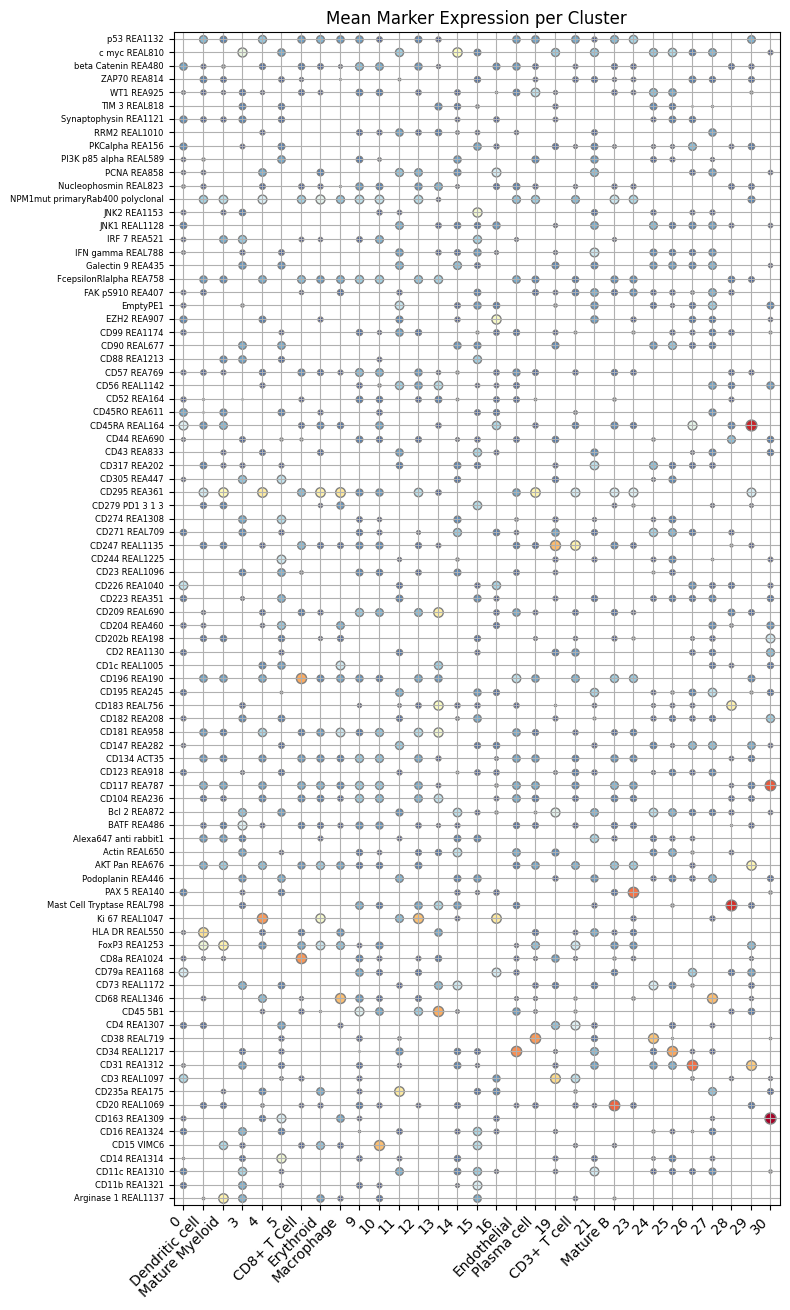

In [47]:
# Heatmap
import matplotlib.pyplot as plt
import numpy as np


cluster_means.index = cluster_means.index.map(lambda x: custom_labels.get(int(x), str(x)))

# Now: x = clusters, y = markers
x_labels = cluster_means.index.tolist()  # clusters
y_labels = list(selected_features) + list(unselected_features)  # markers

fig, ax = plt.subplots(figsize=(8, len(y_labels) * 0.15))  # scale height to #markers
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=6, rotation=0)

for x_idx, cluster in enumerate(x_labels):
    for y_idx, gene in enumerate(y_labels):
        val = cluster_means.loc[cluster, gene]
        color = plt.cm.RdYlBu_r(val / cluster_means.values.max())

        safe_val = max(val, 0) if not np.isnan(val) else 0
        dot_size = np.sqrt(safe_val) * 30  # scale factor for visibility

        ax.scatter(x_idx, y_idx, s=dot_size, color=color, edgecolors='grey')

# Formatting
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_ylim(-0.5, len(y_labels) - 0.5)

ax.set_title('Mean Marker Expression per Cluster')
ax.grid(True)

plt.tight_layout()
plt.show()



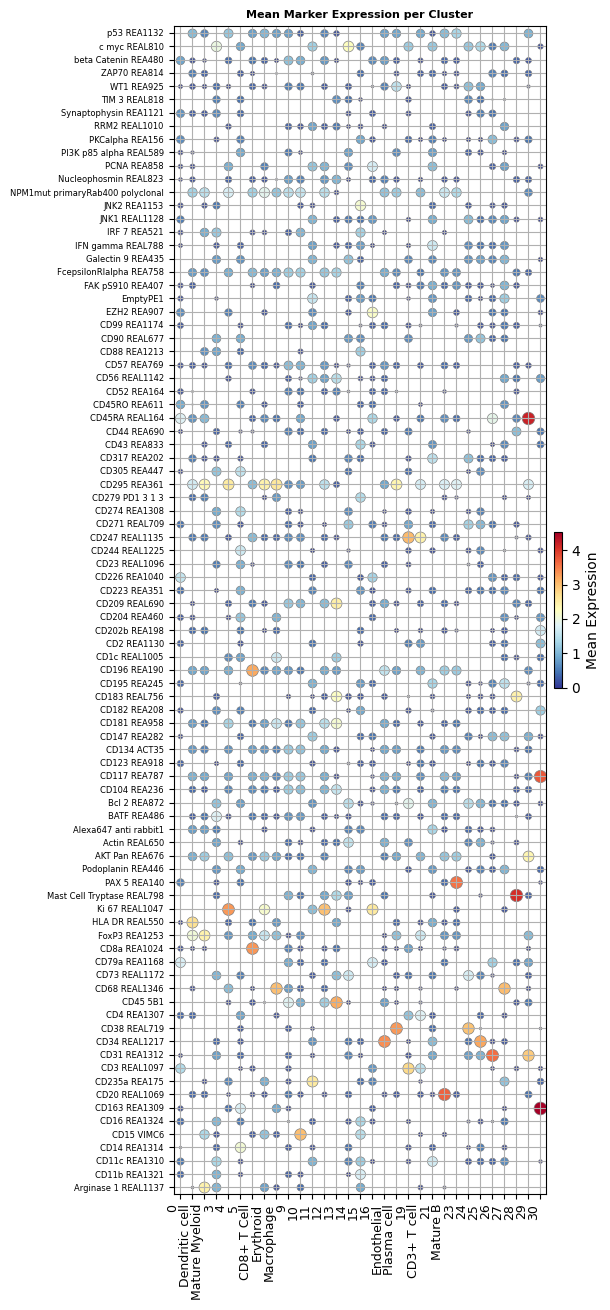

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare labels
x_labels = cluster_means.index.tolist()  # clusters
y_labels = list(selected_features) + list(unselected_features)  # markers

# Scale figure height to number of markers
fig_height = max(6, len(y_labels) * 0.15)
fig, ax = plt.subplots(figsize=(len(x_labels) * 0.2, fig_height))

# Normalize values for consistent color mapping
vmax = cluster_means.values.max()
norm = plt.Normalize(vmin=0, vmax=vmax)
cmap = plt.cm.RdYlBu_r

for x_idx, cluster in enumerate(x_labels):
    for y_idx, gene in enumerate(y_labels):
        val = cluster_means.loc[cluster, gene]
        safe_val = max(val, 0) if not np.isnan(val) else 0
        dot_size = np.sqrt(safe_val) * 40  # adjust scale factor

        ax.scatter(
            x_idx, y_idx,
            s=dot_size,
            color=cmap(norm(val)),
            edgecolors='grey',
            linewidth=0.5
        )

# Formatting
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='right', fontsize=9)

ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=6)

ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_ylim(-0.5, len(y_labels) - 0.5)

ax.set_title('Mean Marker Expression per Cluster', fontsize=8, weight='bold')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.02)
cbar.set_label("Mean Expression", fontsize=10)

ax.grid(True)
plt.tight_layout()
plt.savefig("dotplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
# Save as PNG
plt.savefig("dotplot.png", dpi=299, bbox_inches="tight")

# Or save as PDF (vector format, great for publications)
# plt.savefig("dotplot.pdf", bbox_inches="tight")

plt.show()

<Figure size 640x480 with 0 Axes>

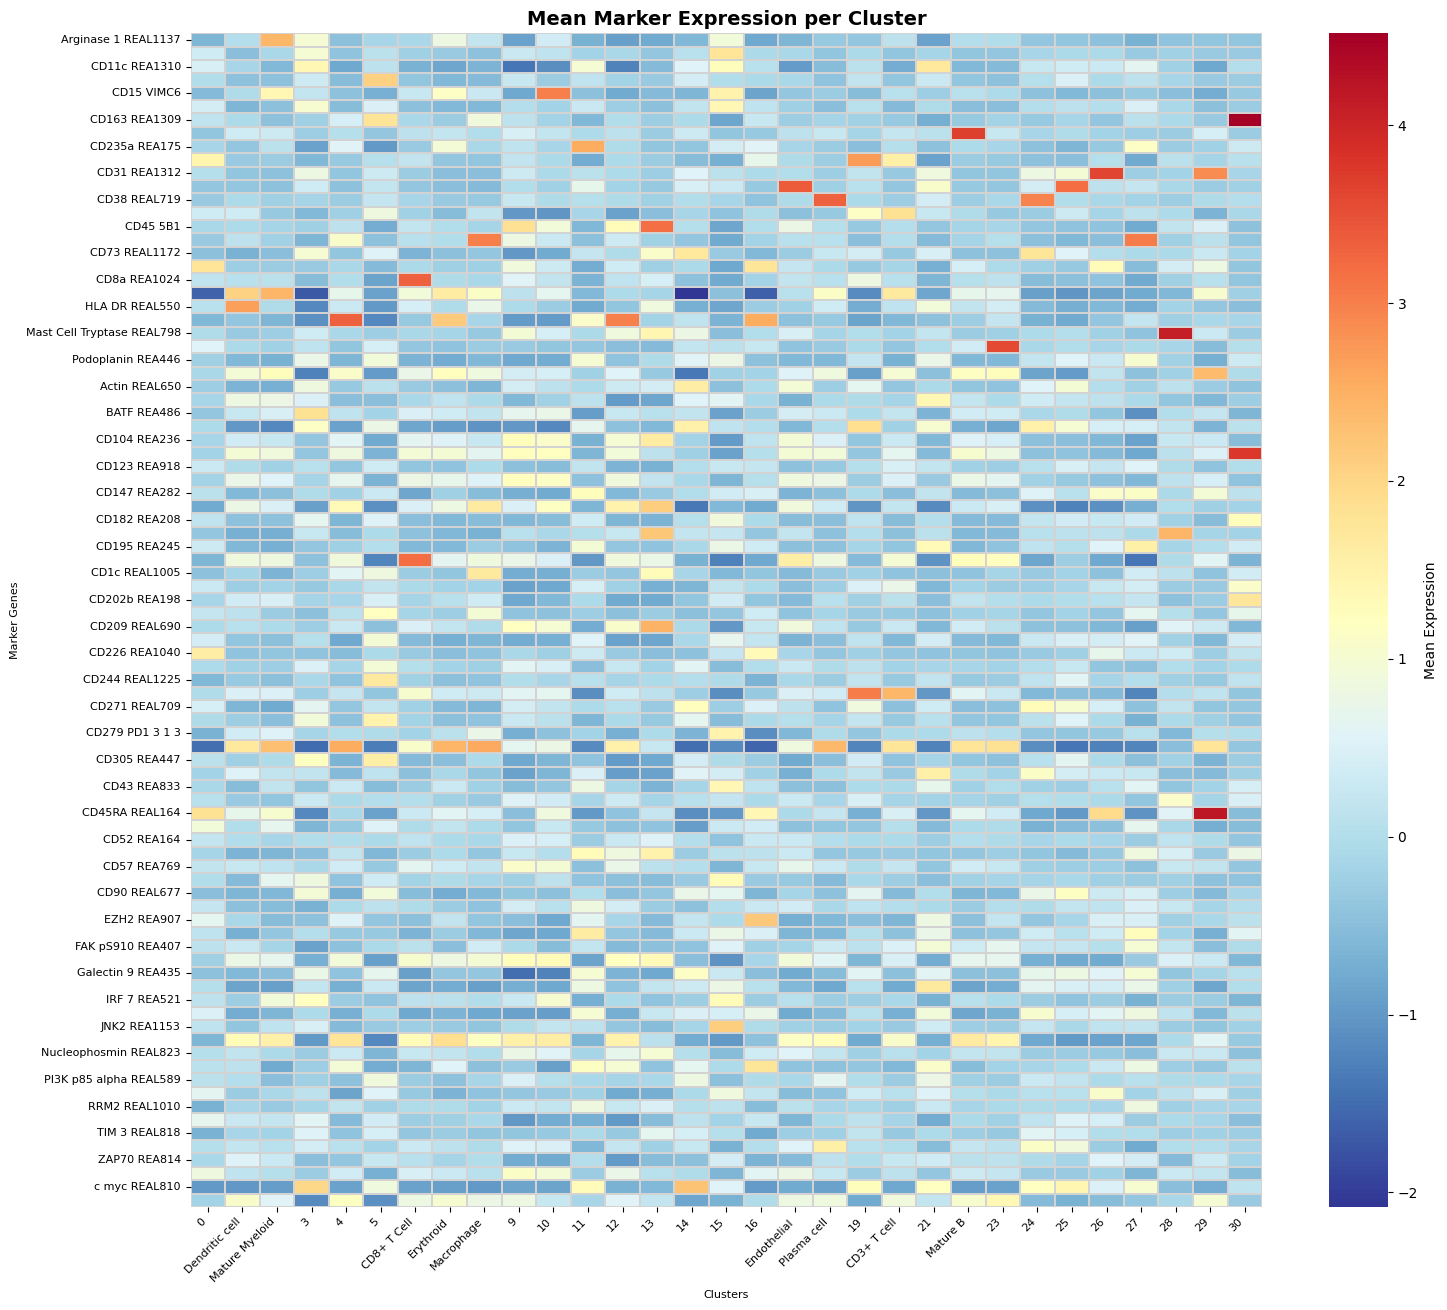

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose so rows = markers, columns = clusters
data = cluster_means.T  

# Scale figure size based on number of markers
fig_width = max(8, len(cluster_means.index) * 0.5)   # clusters on x-axis
fig_height = max(6, len(data.index) * 0.15)           # markers on y-axis

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(
    data,
    cmap="RdYlBu_r",
    cbar_kws={'label': 'Mean Expression'},
    linewidths=0.3,
    linecolor='lightgrey'
)

plt.title('Mean Marker Expression per Cluster', fontsize=14, weight='bold')
plt.xlabel('Clusters', fontsize=8)
plt.ylabel('Marker Genes', fontsize=8)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

In [ ]:
# Top markers

# Run differential expression analysis
# sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Convert to DataFrame
marker_df = sc.get.rank_genes_groups_df(adata, group=None)  # group=None gets all clusters

marker_df['names'] = marker_df['names'].apply(lambda x: selected_features[int(x)])
top_k = 5
top_markers = (
    marker_df
    .sort_values(['group', 'logfoldchanges'], ascending=[True, False])
    .groupby('group')
    .head(top_k)
)

top_markers.to_csv('top_markers_per_cluster.csv', index=False)

In [ ]:
top_markers

In [ ]:

# Optional: Save results
adata.obs.to_csv("cluster_assignments.csv", index=False)

In [ ]:
df.columns[df.isna().any()].tolist()

In [ ]:
# Split AnnData by 'sample' column
split_dict = {
    sample: adata[adata.obs['unique_region'] == sample].copy()
    for sample in adata.obs['unique_region'].unique()
}

In [ ]:
split_dict

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute UMAP embedding
sc.tl.umap(adata)

# Step 2: Plot UMAP colored by Leiden clusters
sc.pl.umap(adata, color='leiden', title='Leiden Clustering (UMAP)', palette='tab20', save=False)



In [ ]:
# Optional: Plot spatial coordinates colored by cluster
def plot_spatial_coordinates(adata, save_path):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        x=adata.obs['Nuc X'],
        y=adata.obs['Nuc Y Inv'],
        hue=adata.obs['leiden'],
        palette='tab20',
        s=9,
        linewidth=-1 
    )
    plt.title('Spatial View of Leiden Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Cluster', bbox_to_anchor=(0.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"{save_path}.png")
    plt.show()
    

for region_name, data in split_dict.items():
    print(f"Plot for region {region_name}")
    output_prefix = os.path.join(OUTPUT_DIR, region_name)
    plt_f = plot_spatial_coordinates(data, output_prefix)
    # data.obs.
    data.obs.to_csv(f"{output_prefix}_cluster_assignments.csv", index=False)